#  Employee Turnover Analytics


### ------------------------------------------------------------------
### Importing required libraries
### ------------------------------------------------------------------

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read HR_comma_sep.csv using pandas
data = pd.read_csv("HR_comma_sep.csv")


#  1. Perform data quality checks by checking for missing values, if any.

In [3]:
# Print top 5 rows in DataFrame
data.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# Display a summary of the DataFrame, including the column names, non-null count, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# CHeck Null values using a different method
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
# Generate descriptive statistics.
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Print Columns in DataFrame
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#   2. Understand what factors contributed most to employee turnover at EDA.

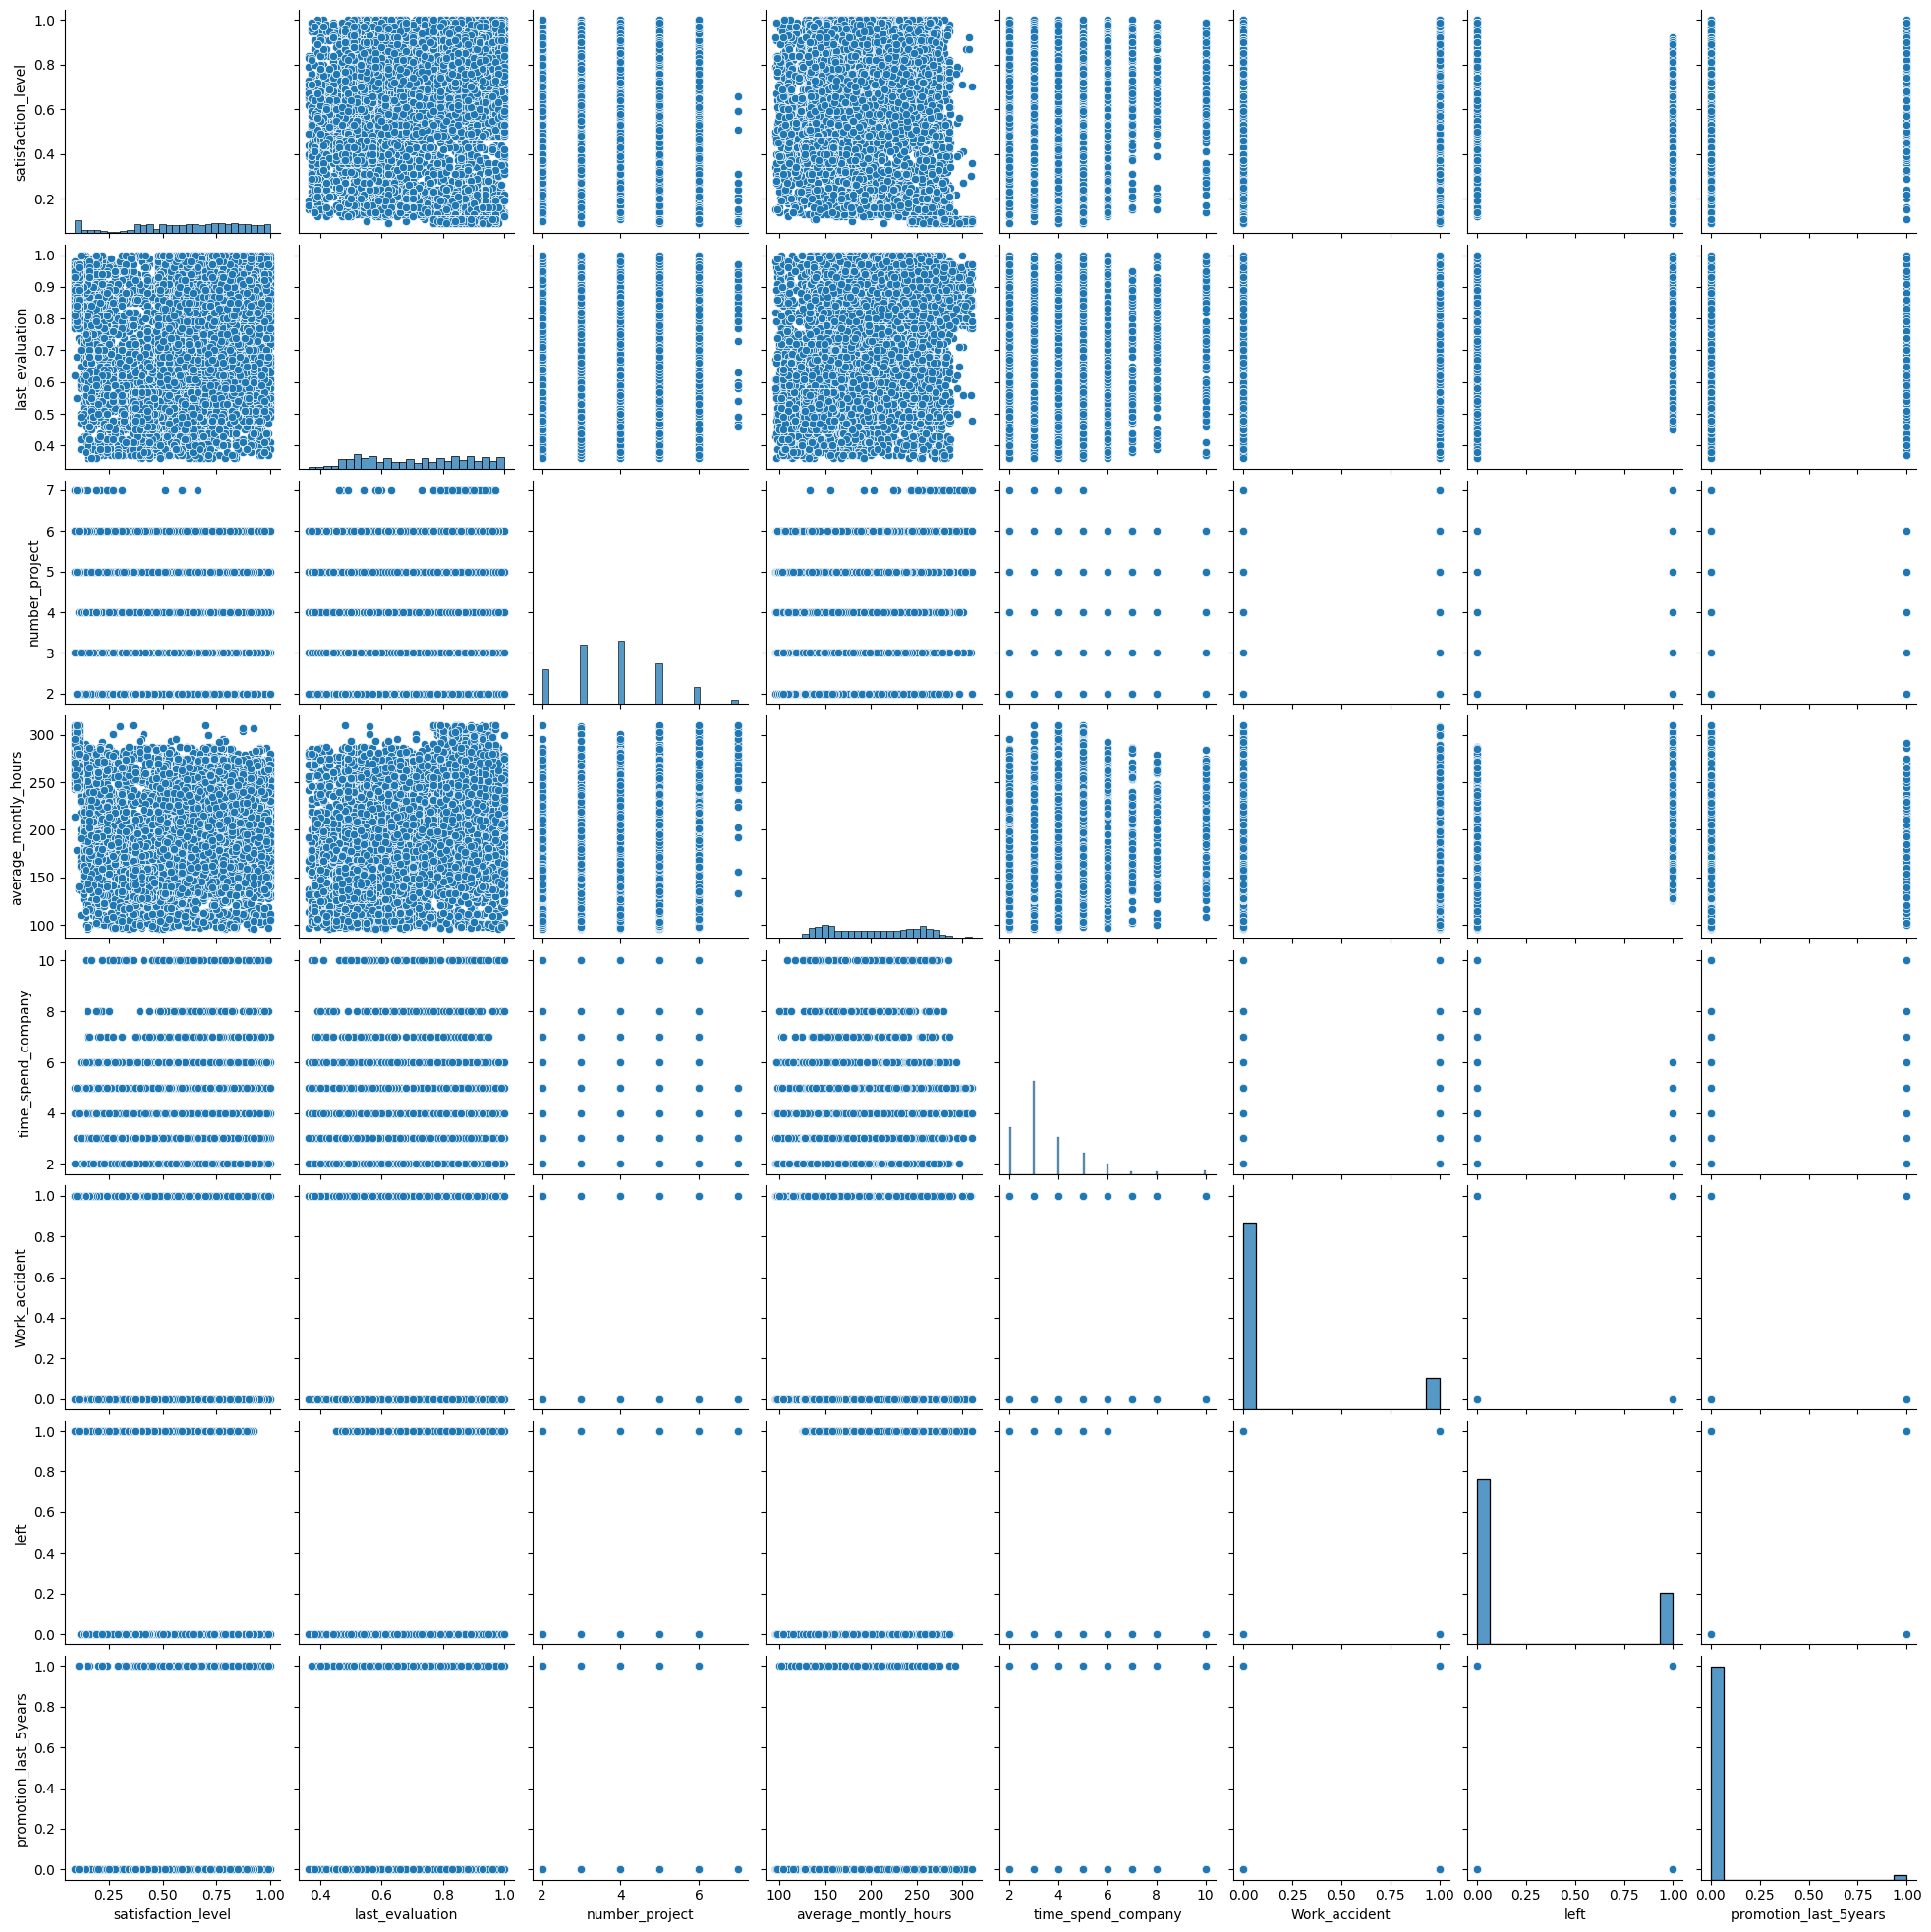

In [81]:
# create a grid of Axes to see relationship between variables
sns.pairplot(data)

In [10]:
# Encode categorical variables
data['salary'] = data['salary'].map({'low': 0, 'medium': 1, 'high': 2})

df = pd.get_dummies(data, columns=['department'], drop_first=True)

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,0,False,False,False,False,False,False,False,True,False


### ------------------------------------------------------------------------------------------------------
### 2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
### ------------------------------------------------------------------------------------------------------

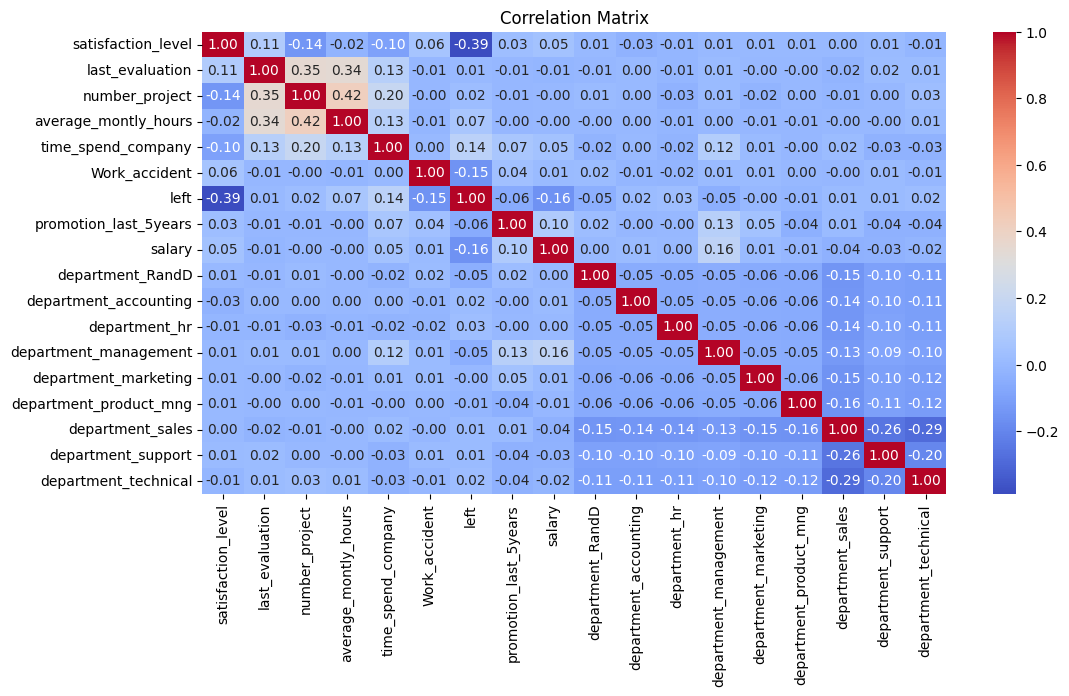

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------------
##### Basis Corelation matrix; we can infer (average_monthly_hours & number_project), (average_monthly_hours & last_evaluation), (satisfaction_level & left), (last_evaluation & number_project) columns have high Corelation
#### ---------------------------------------------------------------------------------------------------------------------------------

##### ------------------------------------------------------------------------------------------
### 2.2 Draw the distribution plot of:
#####  ■ Employee Satisfaction (use column satisfaction_level)
#####  ■ Employee Evaluation (use column last_evaluation)
#####  ■ Employee Average Monthly Hours (use column average_montly_hours)
##### ------------------------------------------------------------------------------------------

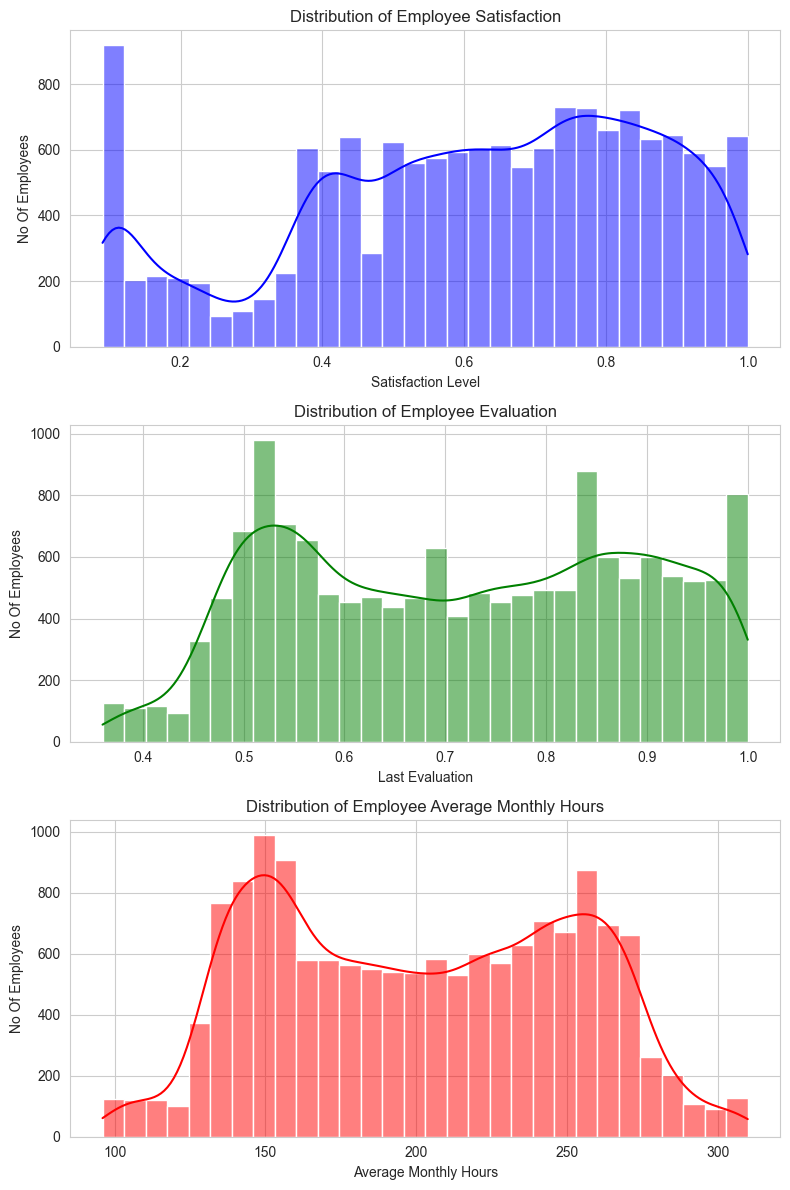

In [17]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Employee Satisfaction Distribution
sns.histplot(df['satisfaction_level'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Employee Satisfaction")
axes[0].set_xlabel("Satisfaction Level")
axes[0].set_ylabel("No Of Employees")

# Employee Evaluation Distribution
sns.histplot(df['last_evaluation'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Employee Evaluation")
axes[1].set_xlabel("Last Evaluation")
axes[1].set_ylabel("No Of Employees")

# Employee Average Monthly Hours Distribution
sns.histplot(df['average_montly_hours'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title("Distribution of Employee Average Monthly Hours")
axes[2].set_xlabel("Average Monthly Hours")
axes[2].set_ylabel("No Of Employees")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

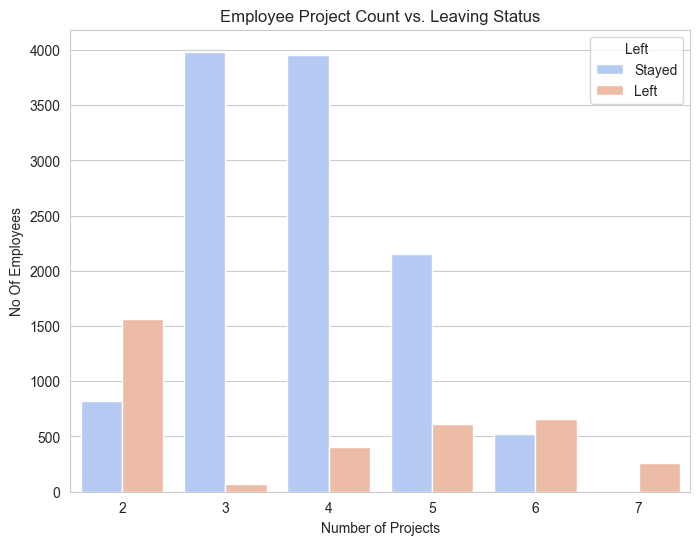

In [18]:

# Bar plot of employee project count based on leaving status
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df, palette='coolwarm')
plt.title("Employee Project Count vs. Leaving Status")
plt.xlabel("Number of Projects")
plt.ylabel("No Of Employees")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

##### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Inferences:
##### 1. Employees with very few projects (2 or less) or an excessive number of projects (more than 6) are more likely to leave.
##### 2. Employees with 3 to 5 projects have a higher retention rate.
##### 3. Overburdened employees with too many projects might be experiencing burnout, leading to higher attrition.
##### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### ----------------------------------------------------------------------------------------------------------------
### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
##### ----------------------------------------------------------------------------------------------------------------

C:\Users\maslam\AppData\Local\Temp\ipykernel_10780\1488860897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='coolwarm')


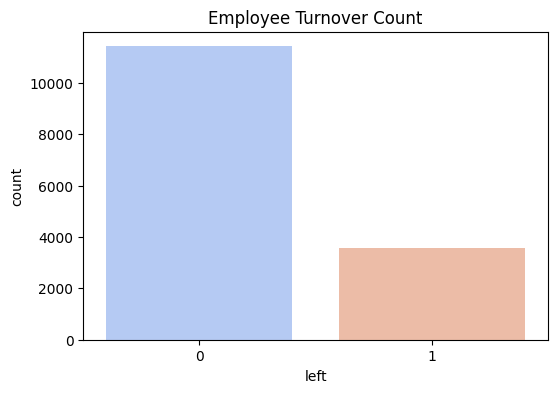

In [85]:
# Visualizing employee turnover
plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df, palette='coolwarm')
plt.title("Employee Turnover Count")
plt.show()

In [22]:
# Filter employees who left
df_left = df[df['left'] == 1]  

# Select features for clustering
X = df_left[['satisfaction_level', 'last_evaluation']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

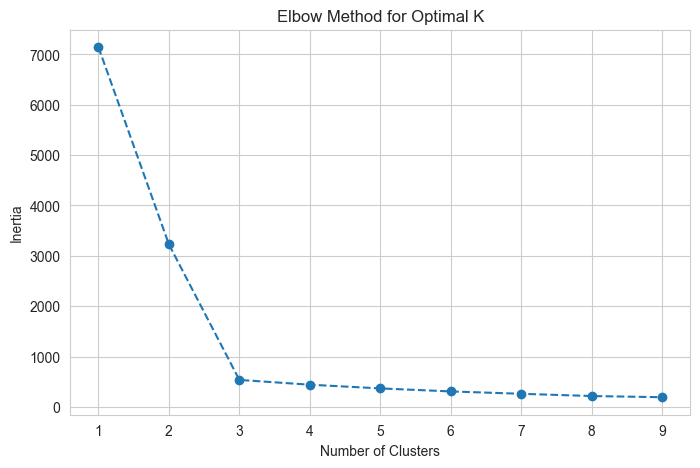

In [23]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\maslam\AppData\Local\Temp\ipykernel_15068\2984620428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Cluster'] = kmeans.fit_predict(X_scaled)


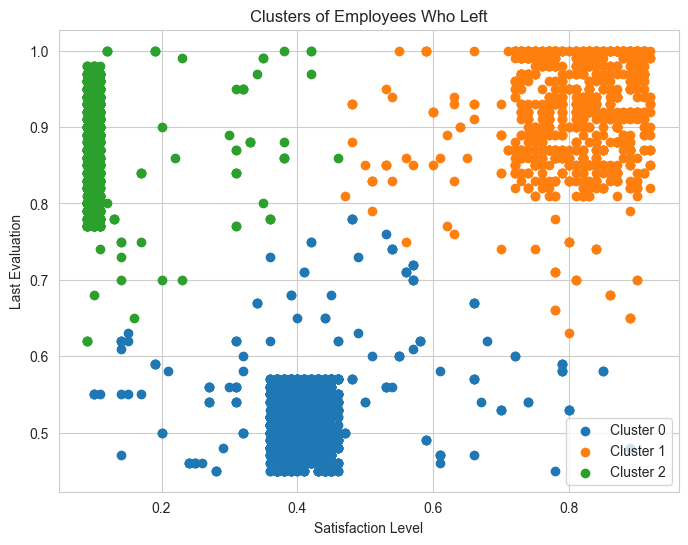

In [24]:
# This shows for k = 3 is the optimal k for KMeans 
# Apply K-Means with optimal K (choose from Elbow plot, e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_left['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(df_left[df_left['Cluster'] == cluster]['satisfaction_level'],
                df_left[df_left['Cluster'] == cluster]['last_evaluation'],
                label=f'Cluster {cluster}')

plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of Employees Who Left')
plt.legend()
plt.show()

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------
####   Basis above analysis we can infer:
####    CLUSTER1 - Blue: 
######           Employees with average satisfaction_level with low last_evaluation left. THese indicate disengaged employees.
####    CLUSTER2 - Orange: 
######           Employees with high satisfaction_level having high last_evaluation left (Maybe these are high performing individuals who got better oppurtunity with latest appraisals OR which might indicate overworked employees.)
####    CLUSTER3 - Green: 
######           Employees with low satisfaction_level having high last_evaluation left (Maybe these are high performing individuals who are not happy with work life balance or bad management)
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
# Filter employees who left
df_left = df[df['left'] == 1]  

# Select features for clustering
X = df_left[['average_montly_hours', 'satisfaction_level']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

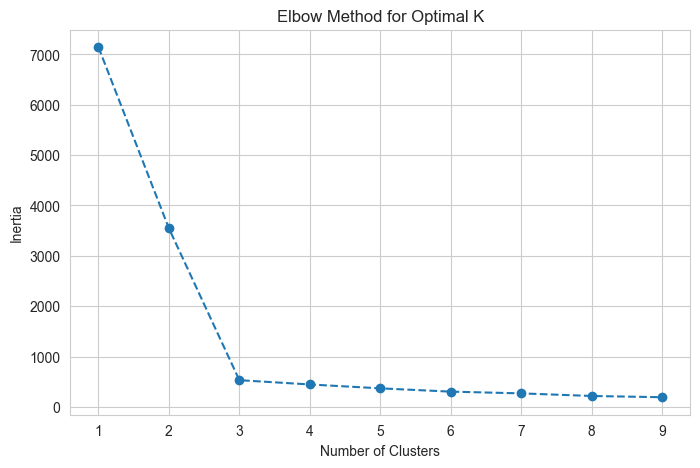

In [26]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\maslam\AppData\Local\Temp\ipykernel_15068\2569163310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Cluster'] = kmeans.fit_predict(X_scaled)


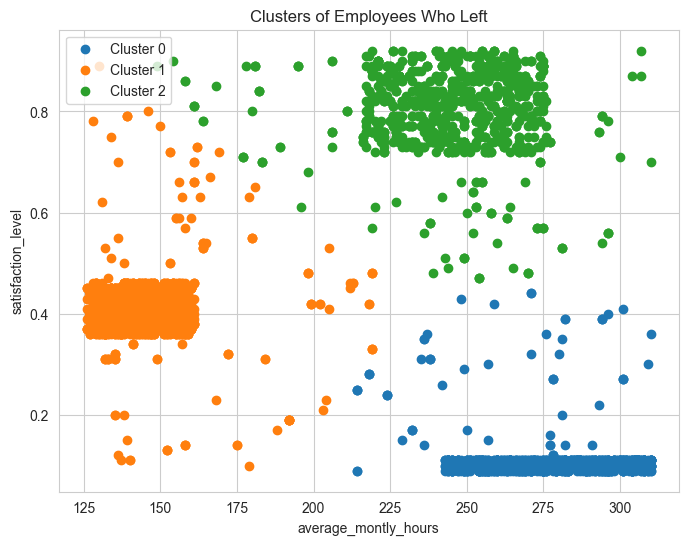

In [27]:
# This shows for k = 3 is the optimal k for KMeans 
# Apply K-Means with optimal K (choose from Elbow plot, e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_left['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(df_left[df_left['Cluster'] == cluster]['average_montly_hours'],
                df_left[df_left['Cluster'] == cluster]['satisfaction_level'],
                label=f'Cluster {cluster}')

plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.title('Clusters of Employees Who Left')
plt.legend()
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------
####   Basis above analysis we can infer:
####    CLUSTER1 - Blue: 
######           Employees with high average_montly_hours having low satisfaction score left (Maybe worklife balance is not good or manager is not good resulting in bad experience. THese also indicate overworked employees)
####    CLUSTER2 - Orange: 
######           Employees with low average_montly_hours having average satisfaction_score left  (Maybe these are low performing individuals & disengaged employees)
####    CLUSTER3 - Green: 
######           Employees with high average_montly_hours having high satisfaction_score left (Maybe these are high performing individuals who got better oppurtunity)
#### ----------------------------------------------------------------------------------------------------------------------------------------------------

#### -----------------------------------------------------------------------------------------------------
###  4. Handle the left Class Imbalance using the SMOTE technique.
#### -----------------------------------------------------------------------------------------------------

In [33]:
# Read HR_comma_sep.csv using pandas
data = pd.read_csv("HR_comma_sep.csv")

In [34]:
# Pre-processing: Convert categorical columns to numerical
categorical_vars = ['department', 'salary']
numeric_vars = [col for col in data.columns if col not in categorical_vars]
df_categorical = pd.get_dummies(data[categorical_vars])
df_numeric = data[numeric_vars]
df_processed = pd.concat([df_numeric, df_categorical], axis=1)

In [35]:
# Stratified split of dataset
y = df_processed['left']
X = df_processed.drop(columns=['left'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [36]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

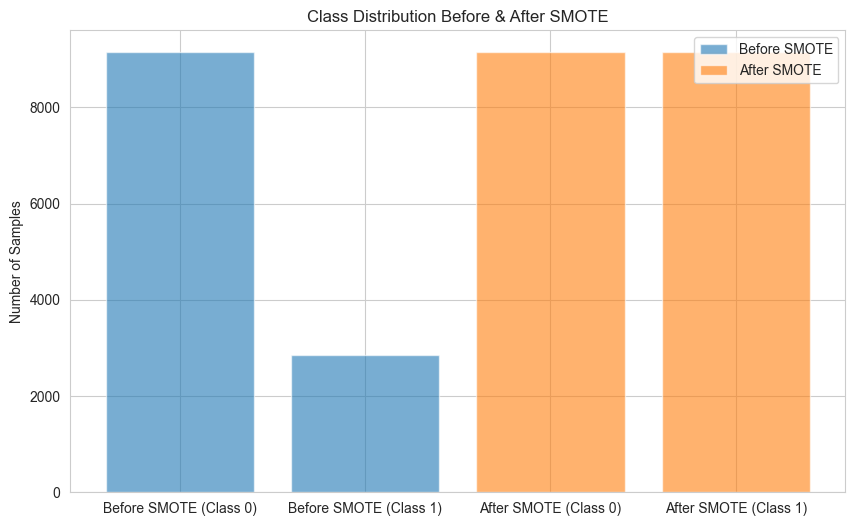

In [72]:
# Visualizing the class distribution before and after SMOTE
plt.figure(figsize=(10,6))
plt.bar(["Before SMOTE (Class 0)", "Before SMOTE (Class 1)"], Counter(y_train).values(), label="Before SMOTE", alpha=0.6)
plt.bar(["After SMOTE (Class 0)", "After SMOTE (Class 1)"], Counter(y_train_resampled).values(), label="After SMOTE", alpha=0.6)
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before & After SMOTE")
plt.legend()
plt.show()

#### ----------------------------------------------------------------------------------------------------------------
### 5. Perform 5-fold cross-validation model training and evaluate performance.
#####  5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
#####  5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
#####  5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

### 6. Identify the best model and justify the evaluation metrics used.
##### 6.1. Find the ROC/AUC for each model and plot the ROC curve.
##### 6.2. Find the confusion matrix for each of the models.
##### 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?
#### ----------------------------------------------------------------------------------------------------------------

In [62]:
# Perform 5-fold cross-validation and model training
def evaluate_model(model, X, y, X_test, y_test, model_name):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    y_pred = cross_val_predict(model, X, y, cv=skf)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y, y_pred))
    
    # Train model and get probabilities
    model.fit(X, y)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()
    
    # Confusion Matrix
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

    return model, y_probs

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      9142
           1       0.80      0.82      0.81      9142

    accuracy                           0.81     18284
   macro avg       0.81      0.81      0.81     18284
weighted avg       0.81      0.81      0.81     18284



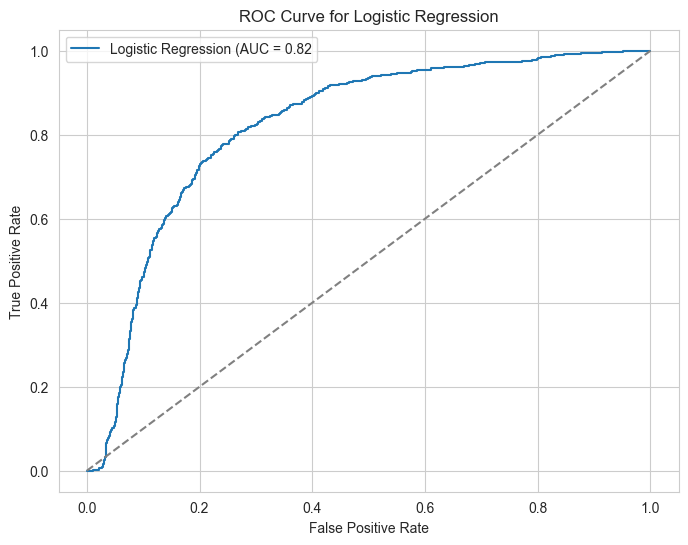

Confusion Matrix for Logistic Regression:
[[1833  453]
 [ 199  515]]


In [63]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=123)
log_reg, log_probs = evaluate_model(log_reg, X_train_resampled, y_train_resampled, X_test, y_test, "Logistic Regression")


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9142
           1       0.99      0.98      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.99      0.98      0.98     18284
weighted avg       0.99      0.98      0.98     18284



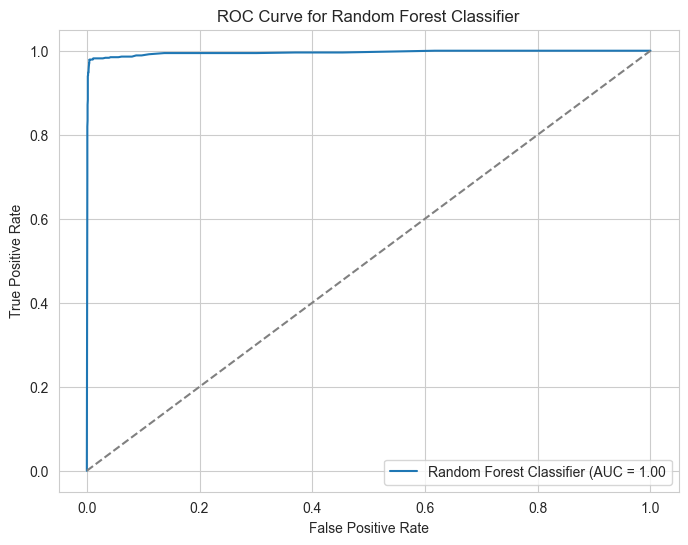

Confusion Matrix for Random Forest Classifier:
[[2272   14]
 [  15  699]]


In [64]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=123)
rf_clf, rf_probs = evaluate_model(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest Classifier")

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



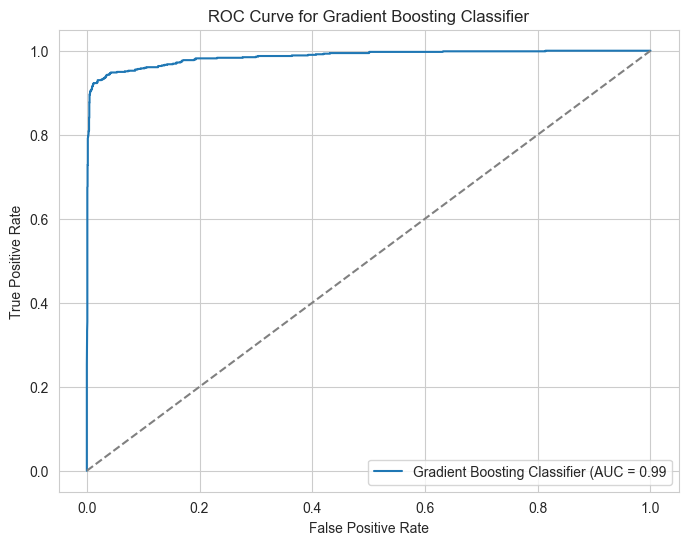

Confusion Matrix for Gradient Boosting Classifier:
[[2228   58]
 [  50  664]]


In [65]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
gb_clf, gb_probs = evaluate_model(gb_clf, X_train_resampled, y_train_resampled, X_test, y_test, "Gradient Boosting Classifier")

##### -------------------------------------------------------------------------------------------------------------------------
#### In the context of employee retention, recall is more important than precision. A high recall ensures that we correctly identify most employees who are at risk of leaving. (Recall is important in scenarios where False Negatives are costly.)
#### Since we want to identify employees who are likely to leave, minimizing false negatives is crucial.
#### From Above, we can see; Random Forest Classifier is giving highest recall with lowest FN FP
##### -------------------------------------------------------------------------------------------------------------------------

#### --------------------------------------------------------------------------------------------------------
### 7. Suggest various retention strategies for targeted employees.
#### 7.1. Using the best model, predict the probability of employee turnover in the test data.
#### 7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
#####  ■ Safe Zone (Green) (Score < 20%)
#####  ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
#####  ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
#####  ■ High-Risk Zone (Red) (Score > 90%).
#### --------------------------------------------------------------------------------------------------------

## Basis Random Forest Classifier

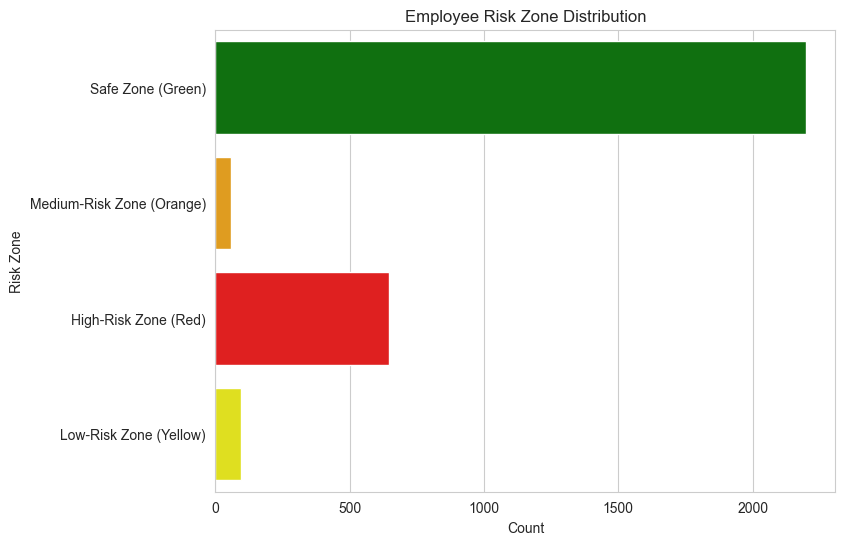

Risk Zone                
Safe Zone (Green)            2198
High-Risk Zone (Red)          647
Low-Risk Zone (Yellow)         97
Medium-Risk Zone (Orange)      58
Name: count, dtype: int64


In [69]:
# Predict probabilities and categorize employees
prob_thresholds = [(0.2, 'Safe Zone (Green)'), (0.6, 'Low-Risk Zone (Yellow)'), (0.9, 'Medium-Risk Zone (Orange)'), (1.0, 'High-Risk Zone (Red)')]
def categorize_risk(prob):
    for threshold, category in prob_thresholds:
        if prob <= threshold:
            return category
X_test['Risk Zone'] = [categorize_risk(p) for p in rf_probs]

# Plot bar chart for risk zones
plt.figure(figsize=(8, 6))
sns.countplot(y=X_test['Risk Zone'], palette={'Safe Zone (Green)': 'green', 'Low-Risk Zone (Yellow)': 'yellow', 'Medium-Risk Zone (Orange)': 'orange', 'High-Risk Zone (Red)': 'red'})
plt.title("Employee Risk Zone Distribution")
plt.xlabel("Count")
plt.ylabel("Risk Zone")
plt.show()

print(X_test[['Risk Zone']].value_counts())

## Basis Gradient Boosting Classifier

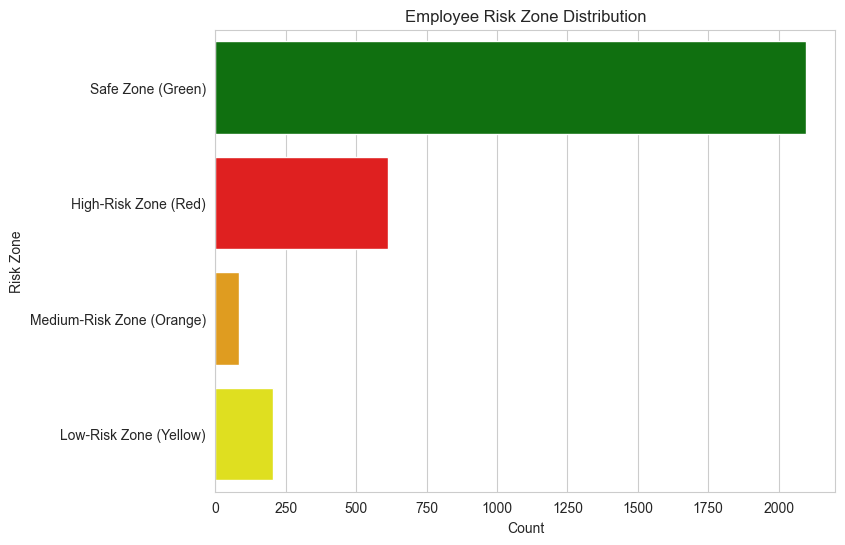

Risk Zone                
Safe Zone (Green)            2097
High-Risk Zone (Red)          614
Low-Risk Zone (Yellow)        206
Medium-Risk Zone (Orange)      83
Name: count, dtype: int64


In [70]:
# Predict probabilities and categorize employees
prob_thresholds = [(0.2, 'Safe Zone (Green)'), (0.6, 'Low-Risk Zone (Yellow)'), (0.9, 'Medium-Risk Zone (Orange)'), (1.0, 'High-Risk Zone (Red)')]
def categorize_risk(prob):
    for threshold, category in prob_thresholds:
        if prob <= threshold:
            return category
X_test['Risk Zone'] = [categorize_risk(p) for p in gb_probs]

# Plot bar chart for risk zones
plt.figure(figsize=(8, 6))
sns.countplot(y=X_test['Risk Zone'], palette={'Safe Zone (Green)': 'green', 'Low-Risk Zone (Yellow)': 'yellow', 'Medium-Risk Zone (Orange)': 'orange', 'High-Risk Zone (Red)': 'red'})
plt.title("Employee Risk Zone Distribution")
plt.xlabel("Count")
plt.ylabel("Risk Zone")
plt.show()

print(X_test[['Risk Zone']].value_counts())
